In [1]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


Populating the interactive namespace from numpy and matplotlib


In [2]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Specific Plotting Params
i_leu = 0
i_delta = 2
i_heu = 4

ps = 0

In [3]:
dir = 'data/random_sink/fourier_test/bad_csv/'

#file_HEU003 = dir + 'HEU1p_aq33_s_05_swu180_t1009_R5.csv'   # HEU trade on
#file_2 = dir + 'HEU0p_aq33_s_05_swu180_t1009_R5.csv' #HEU off
#file_3 = dir + 'test3_new.csv' #HEU off (repeat)
file_HEU003 = dir + 'test.csv'   # HEU trade on
file_2 = dir + 'test2.csv' #HEU off
file_3 = dir + 'test3.csv' #HEU off (repeat)


raw_data = pd.read_csv(file_HEU003) 
raw_data2 = pd.read_csv(file_2) 
raw_data3 = pd.read_csv(file_3) 

In [4]:
LEU = raw_data[raw_data['Prototype'] == "LEU"]
delta_LEU = raw_data[raw_data['Prototype'] == "delta_LEU"]
covert_HEU = raw_data[raw_data['Prototype'] == "covert_HEU"]

In [5]:
LEU2 = raw_data2[raw_data2['Prototype'] == "LEU"]
delta_LEU2 = raw_data2[raw_data2['Prototype'] == "delta_LEU"]
covert_HEU2 = raw_data2[raw_data2['Prototype'] == "covert_HEU"]

LEU3 = raw_data3[raw_data3['Prototype'] == "LEU"]
delta_LEU3 = raw_data3[raw_data3['Prototype'] == "delta_LEU"]
covert_HEU3 = raw_data3[raw_data3['Prototype'] == "covert_HEU"]

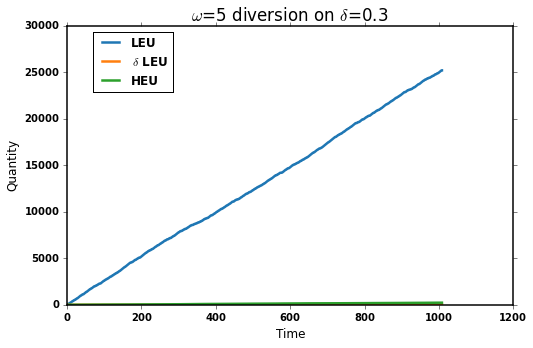

In [6]:
p_leu = plt.plot(LEU['Time'],LEU[' Quantity'], label='LEU', color=tableau20[i_leu])
p_delta = plt.plot(delta_LEU['Time'],delta_LEU[' Quantity'], label='$\delta$ LEU', color=tableau20[i_delta])
p_heu = plt.plot(covert_HEU['Time'],covert_HEU[' Quantity'], label='HEU', color=tableau20[i_heu])

plt.legend(bbox_to_anchor=(0.25, 1))
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title("$\omega$=5 diversion on $\delta$=0.3")


In [7]:
LEU_tp =(LEU[' Quantity']- LEU[' Quantity'].shift(1))
delta_LEU_tp =  delta_LEU[' Quantity']- delta_LEU[' Quantity'].shift(1)
covert_HEU_tp =  covert_HEU[' Quantity']- covert_HEU[' Quantity'].shift(1) 

In [8]:
LEU_tp2 =(LEU2[' Quantity']- LEU2[' Quantity'].shift(1))
delta_LEU_tp2 =  delta_LEU2[' Quantity']- delta_LEU2[' Quantity'].shift(1)
covert_HEU_tp2 =  covert_HEU2[' Quantity']- covert_HEU2[' Quantity'].shift(1) 

LEU_tp3 =(LEU3[' Quantity']- LEU3[' Quantity'].shift(1))
delta_LEU_tp3 =  delta_LEU3[' Quantity']- delta_LEU3[' Quantity'].shift(1)
covert_HEU_tp3 =  covert_HEU3[' Quantity']- covert_HEU3[' Quantity'].shift(1) 


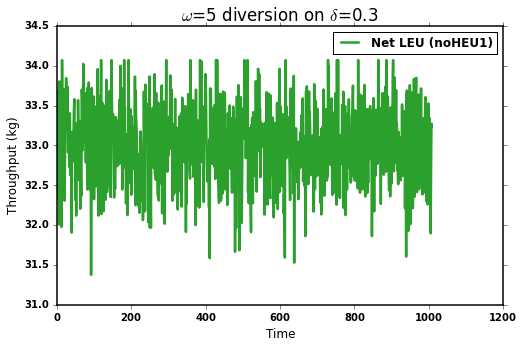

In [9]:
plt.plot(LEU2['Time'],(LEU_tp2), label='Net LEU (noHEU1)', color=tableau20[i_leu+4])
#plt.plot(LEU3['Time'],(LEU_tp3), label='Net LEU (noHEU2)', color=tableau20[i_leu+6])
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("$\omega$=5 diversion on $\delta$=0.3")


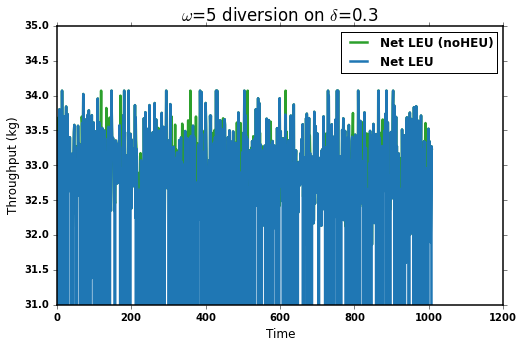

In [10]:
ymin=31
ymax=35
ylim(ymin, ymax)  

plt.plot(LEU2['Time'],(LEU_tp2), label='Net LEU (noHEU)', color=tableau20[i_leu+4])
plt.plot(LEU['Time'],(LEU_tp), label='Net LEU', color=tableau20[i_leu])

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')

if ps == 1:
    savefig('CR_netLEU_thruput2.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")

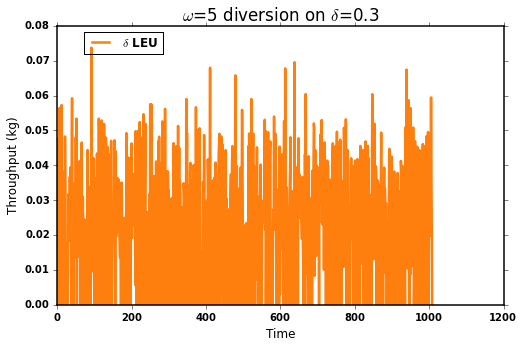

In [11]:
plt.plot(delta_LEU['Time'],delta_LEU_tp, label='$\delta$ LEU', color=tableau20[i_delta])
plt.legend(bbox_to_anchor=(0.25, 1))
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("$\omega$=5 diversion on $\delta$=0.3")


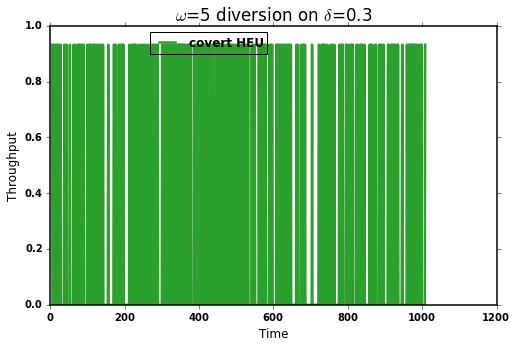

In [12]:
plt.plot(LEU['Time'][3:],covert_HEU_tp, label='covert HEU', color=tableau20[i_heu])

plt.legend(bbox_to_anchor=(0.5, 1))
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title("$\omega$=5 diversion on $\delta$=0.3")


In [13]:
#file_4 = dir + 'HEU03p_aq33_s_05_swu180_t100_E5_n2.csv'   # HEU trade on
file_4 = dir + 'HEU04p_aq33_s_05_swu180_t100_E5.csv'   # HEU trade on
#file_4 = dir + 'last_test.csv'   # HEU trade on

file_5 = dir + 'HEU0p_aq33_s_05_swu180_t100_E5_n5.csv' #HEU off

raw_data4 = pd.read_csv(file_4) 
raw_data5 = pd.read_csv(file_5) 

In [14]:
LEU4 = raw_data4[raw_data4['Prototype'] == "LEU"]
delta_LEU4 = raw_data4[raw_data4['Prototype'] == "delta_LEU"]
covert_HEU4 = raw_data4[raw_data4['Prototype'] == "covert_HEU"]

LEU5 = raw_data5[raw_data5['Prototype'] == "LEU"]
delta_LEU5 = raw_data5[raw_data5['Prototype'] == "delta_LEU"]
covert_HEU5 = raw_data5[raw_data5['Prototype'] == "covert_HEU"]


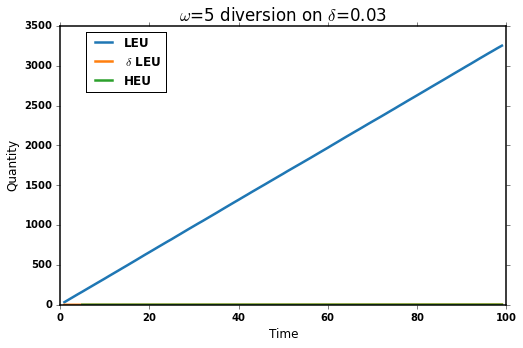

In [15]:
p_leu = plt.plot(LEU4['Time'],LEU4[' Quantity'], label='LEU', color=tableau20[i_leu])
p_delta = plt.plot(delta_LEU4['Time'],delta_LEU4[' Quantity'], label='$\delta$ LEU', color=tableau20[i_delta])
p_heu = plt.plot(covert_HEU4['Time'],covert_HEU4[' Quantity'], label='HEU', color=tableau20[i_heu])

plt.legend(bbox_to_anchor=(0.25, 1))
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title("$\omega$=5 diversion on $\delta$=0.03")


In [16]:
LEU_tp4 =(LEU4[' Quantity']- LEU4[' Quantity'].shift(1))
delta_LEU_tp4 =  delta_LEU4[' Quantity']- delta_LEU4[' Quantity'].shift(1)
covert_HEU_tp4 =  covert_HEU4[' Quantity']- covert_HEU4[' Quantity'].shift(1) 

LEU_tp5 =(LEU5[' Quantity']- LEU5[' Quantity'].shift(1))
delta_LEU_tp5 =  delta_LEU5[' Quantity']- delta_LEU5[' Quantity'].shift(1)
covert_HEU_tp5 =  covert_HEU5[' Quantity']- covert_HEU5[' Quantity'].shift(1) 


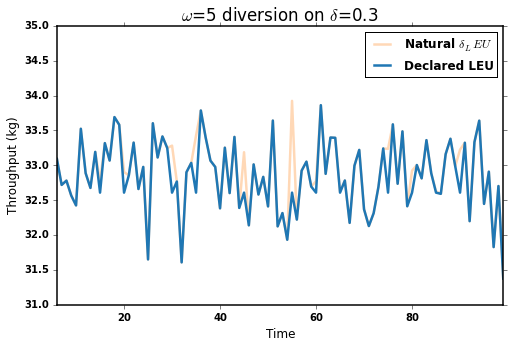

In [17]:
ymin=31
ymax=35
xmin=6
xmax=max(LEU4['Time'])
xlim(xmin, xmax)
ylim(ymin, ymax)  
alpha = 0.3
plt.plot(LEU5['Time'],(LEU_tp5), label='Natural $\delta_LEU$', color=tableau20[i_delta], alpha=alpha)
plt.plot(LEU4['Time'],(LEU_tp4), label='Declared LEU', color=tableau20[i_leu])
#plt.plot(LEU4['Time'][4:],covert_HEU_tp4*1000+5, label='covert HEU', color=tableau20[i_heu],alpha=0.2)

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')

if ps == 1:
    savefig('CR_nat_dec_E5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")



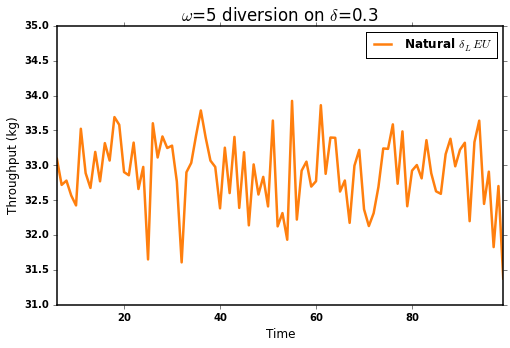

In [18]:
ymin=31
ymax=35
xmin=6
xmax=max(LEU4['Time'])
xlim(xmin, xmax)
ylim(ymin, ymax)  
plt.plot(LEU5['Time'],(LEU_tp5), label='Natural $\delta_LEU$', color=tableau20[i_delta])

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("$\omega$=5 diversion on $\delta$=0.3")

if ps == 1:
    savefig('CR_nat_dec_E5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


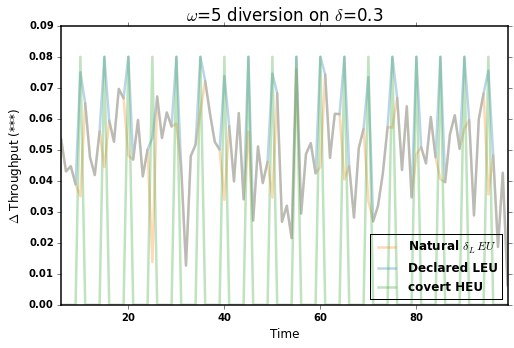

In [19]:
xlim(xmin, xmax)

plt.plot(LEU5['Time'],(delta_LEU_tp5*-1)+0.08, label='Natural $\delta_LEU$', color=tableau20[i_delta], alpha=alpha)
plt.plot(LEU4['Time'],(delta_LEU_tp4*-1)+0.08, label='Declared LEU', color=tableau20[i_leu], alpha=alpha)
plt.plot(LEU4['Time'][4:],covert_HEU_tp4*2, label='covert HEU', color=tableau20[i_heu],alpha=0.3)

plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('$\Delta$ Throughput (***)')

if ps == 1:
    savefig('CR_test_delta_thruput2.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")


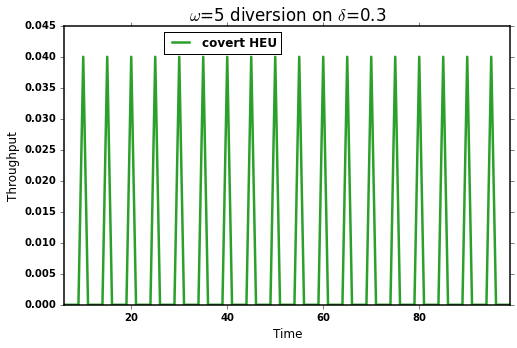

In [20]:
xlim(xmin, xmax)

plt.plot(LEU4['Time'][4:],covert_HEU_tp4, label='covert HEU', color=tableau20[i_heu])

plt.legend(bbox_to_anchor=(0.5, 1))
plt.xlabel('Time')
plt.ylabel('Throughput')
plt.title("$\omega$=5 diversion on $\delta$=0.3")

if ps == 1:
    savefig('CR_covert_E5.png')
else:
    plt.title("$\omega$=5 diversion on $\delta$=0.3")
